# Problem Statement:

The objective of this project is to perform a comprehensive analysis of historical stock market data for a selection of top 10 companies, gathered from publicly available sources, specifically from www.nasdaq.com. The dataset comprises 25,161 rows, each representing the stock market data for a specific company on distinct dates. The primary goal is to apply data analysis and machine learning techniques to extract meaningful insights and make informed predictions related to the stock market behavior.

# Loading Libraries and Importing Dataset

using the `warnings` module to suppress warning messages that might be generated during the analysis. By using `warnings.filterwarnings("ignore")`, we ensure that any warning messages related to deprecated functions, potential data issues, or other non-critical issues will not be displayed. This helps in maintaining a cleaner and more focused analysis output.

In [1]:
import warnings
warnings.filterwarnings("ignore")

Importing various Python libraries that are essential for our data analysis and machine learning tasks. Each library serves a specific purpose in our analysis pipeline:

- `pandas`: Used for data manipulation and handling DataFrames and using its perticular specifications.
- `matplotlib.pyplot`: Used for creating visualizations such as plots and charts.
- `numpy`: Used for numerical computations and array operations.
- `scipy.stats` and `scipy.optimize.minimize`: Used for statistical computations and optimization.
- `statsmodels.tsa.arima.model.ARIMA`: Used for implementing the ARIMA time-series forecasting model.
- `sklearn.metrics.mean_squared_error`: Used for calculating the mean squared error for model evaluation.
- `sklearn.impute.SimpleImputer`: Used for handling missing values in the data.
- `sklearn.model_selection.train_test_split`: Used for splitting data into training and testing sets.
- `sklearn.linear_model.LogisticRegression`: Used for implementing the logistic regression classifier.
- `sklearn.ensemble.RandomForestClassifier`: Used for creating a random forest classifier.
- `sklearn.metrics.accuracy_score`, `sklearn.metrics.precision_score`, `sklearn.metrics.recall_score`, `sklearn.metrics.f1_score`: Used for evaluating classification model performance.
- `sklearn.preprocessing.StandardScaler`: Used for standardizing feature values.
- `sklearn.cluster.KMeans`: Used for performing K-means clustering.
- `tensorflow`: Used for building and training artificial neural networks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats
from scipy.optimize import minimize

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import tensorflow as tf

Using the `pd.read_csv()` function from the `pandas` library to read in the dataset named 'trading_Strategy.csv'. This dataset likely contains the historical stock market data for the selected companies. 

In [3]:
# Reading in the dataset
stocks = pd.read_csv('trading_Strategy.csv')

# Exporatory Data Analysis

Using the `.head()` method on the `stocks` DataFrame. This method displays the first few rows of the dataset, providing a quick overview of its structure and contents. By inspecting the initial rows of the dataset, we can get a sense of the columns, data types, and values present in the dataset. This step is crucial for understanding the data before proceeding with further analysis and processing.

In [4]:
# This will show a quick overview of the dataset
stocks.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,7/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,7/14/2023,$190.69,41616240,$190.23,$191.18,$189.63
2,AAPL,7/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,7/12/2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,7/11/2023,$188.08,46638120,$189.16,$189.30,$186.60


Using the `.dtypes` attribute on the `stocks` DataFrame. This attribute displays the data types of each column in the dataset. Checking the data types is essential to ensure that the columns have been correctly interpreted as the intended data types (e.g., numeric, categorical, datetime). Correctly identifying data types is crucial for performing accurate analyses and applying appropriate data preprocessing techniques.

In [5]:
stocks.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

Using the `.describe()` method on the `stocks` DataFrame. This method calculates and displays summary statistics for the numerical columns in the dataset. The summary includes statistics such as mean, standard deviation, minimum, maximum, and quartiles. Reviewing these summary statistics provides insights into the central tendency and spread of the data, highlighting potential outliers and patterns that might exist in the dataset.

In [6]:
stocks.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


Converting the 'Date' column in the `stocks` DataFrame into a date-time format using the `pd.to_datetime()` function. By applying `.dt.normalize()`, we extract only the date part, effectively setting the time component to midnight. This conversion is crucial when dealing with time-series data analysis, as it allows us to aggregate and analyze data on a daily basis. The resulting `date_time_interval` Series represents the date values in a standardized format for further analysis.

In [7]:
import datetime
date_time_interval = pd.to_datetime(stocks.Date).dt.normalize()
date_time_interval

0       2023-07-17
1       2023-07-14
2       2023-07-13
3       2023-07-12
4       2023-07-11
           ...    
25155   2013-07-24
25156   2013-07-23
25157   2013-07-22
25158   2013-07-19
25159   2013-07-18
Name: Date, Length: 25160, dtype: datetime64[ns]

Updating the 'Date' column in the `stocks` DataFrame with the values from the `date_time_interval` Series. This step is crucial to ensure that the 'Date' column now contains the standardized date values with the time component set to midnight. By updating the 'Date' column in this manner, we align the data with our desired date-time interval for subsequent time-series analysis and visualizations.

In [8]:
stocks.Date = date_time_interval

Rechecking the data types of the columns in the `stocks` DataFrame using the `.dtypes` attribute. By verifying the data types after the previous transformations, we can confirm that the 'Date' column has been successfully converted to the desired date-time format. Ensuring that the data types are accurate and aligned with our analysis objectives is crucial for maintaining the integrity and accuracy of the subsequent analysis steps.

In [9]:
stocks.dtypes

Company               object
Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

Applying lambda functions to remove dollar signs ('$') from the 'Close/Last', 'Open', 'High', and 'Low' columns in the `stocks` DataFrame. These columns likely represent stock price values with dollar symbols. By using the `.map()` function along with a lambda function, we extract the numeric portion of the values and convert them to floating-point numbers. This step is essential to ensure that the stock price values are in a format suitable for further analysis, such as calculations, visualizations, and modeling.

In [10]:
stocks['Close/Last'] = stocks['Close/Last'].map(lambda x:float(x.replace('$','')))
stocks['Open'] = stocks['Open'].map(lambda x:float(x.replace('$','')))
stocks['High'] = stocks['High'].map(lambda x:float(x.replace('$','')))
stocks['Low'] = stocks['Low'].map(lambda x:float(x.replace('$','')))

Rechecking the data types of the columns in the `stocks` DataFrame using the `.dtypes` attribute. After the previous transformations to remove dollar signs and convert to float, we can confirm that the 'Close/Last', 'Open', 'High', and 'Low' columns have been successfully converted to floating-point numbers. Ensuring that the data types are accurate and consistent with the data's nature is crucial for conducting meaningful analysis and modeling tasks.

In [11]:
stocks.dtypes

Company               object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

Using the `.rename()` method on the `stocks` DataFrame to rename the 'Close/Last' column to 'Close'. By setting the `inplace` parameter to `True`, we are modifying the DataFrame in place rather than creating a new DataFrame with the modified column names. Renaming columns can enhance clarity and consistency in the dataset, making it easier to refer to specific columns in subsequent analysis and modeling tasks.

In [12]:
stocks.rename(columns={'Close/Last' : 'Close'}, inplace=True)
stocks

,Company,Date,Close,Volume,Open,High,Low
0,AAPL,2023-07-17,193.99,50520160,191.90,194.32,191.81
1,AAPL,2023-07-14,190.69,41616240,190.23,191.18,189.63
2,AAPL,2023-07-13,190.54,41342340,190.50,191.19,189.78
3,AAPL,2023-07-12,189.77,60750250,189.68,191.70,188.47
4,AAPL,2023-07-11,188.08,46638120,189.16,189.30,186.60
...,...,...,...,...,...,...,...
25155,NFLX,2013-07-24,34.47,33395351,35.67,36.04,34.31
25156,NFLX,2013-07-23,35.75,76792963,35.91,37.46,35.17
25157,NFLX,2013-07-22,37.42,44791095,38.12,38.39,36.73
25158,NFLX,2013-07-19,37.80,18098750,38.20,38.28,37.60


Using the `.value_counts()` method on the 'Company' column of the `stocks` DataFrame. This method calculates and displays the frequency count of unique values in the 'Company' column. By examining the distribution of companies, we can gain insights into the representation of different companies in the dataset. This step is essential for understanding the data's composition and identifying any potential biases or data imbalance related to company-specific information.

In [13]:
stocks.Company.value_counts()

AAPL    2516
SBUX    2516
MSFT    2516
CSCO    2516
QCOM    2516
META    2516
AMZN    2516
TSLA    2516
AMD     2516
NFLX    2516
Name: Company, dtype: int64

Using the `.unique()` method followed by `.size` on the 'Company' column of the `stocks` DataFrame. This combination of methods calculates and displays the count of unique companies present in the dataset. Counting the unique companies helps us understand the breadth of companies covered in the dataset. This information is valuable for assessing the dataset's coverage of various companies and the potential diversity of the analysis and modeling tasks that can be performed.

In [14]:
stocks.Company.unique().size

10

Using the `.isna()` method followed by `.sum()` on the `stocks` DataFrame. This combination of methods calculates and displays the sum of missing values (NaN) for each column in the dataset. By assessing the presence of missing data in different columns, we can identify which features might have incomplete information. Dealing with missing data appropriately is crucial for ensuring the accuracy and reliability of the analysis and modeling outcomes.

In [15]:
stocks.isna().sum()

Company    0
Date       0
Close      0
Volume     0
Open       0
High       0
Low        0
dtype: int64

Using the `.describe()` method on the `stocks` DataFrame once again. By revisiting the summary statistics, we can observe how the dataset has evolved after the various data transformations, conversions, and renaming. This updated summary provides insights into the central tendency, spread, and distribution of the data's numerical columns. Comparing this updated summary to the initial one helps us understand the impact of our data preprocessing steps on the dataset's characteristics.

In [16]:
stocks.describe()

,Close,Volume,Open,High,Low
count,25160.000000,2.516000e+04,25160.000000,25160.000000,25160.000000
mean,102.456078,5.131764e+07,102.431075,103.829650,101.006402
std,101.991265,6.399143e+07,101.996095,103.529424,100.399650
min,1.620000,1.143952e+06,1.620000,1.690000,1.610000
25%,36.567500,1.200394e+07,36.507500,36.890000,36.130000
50%,65.680000,2.672083e+07,65.650000,66.485000,64.915000
75%,134.235000,6.857269e+07,134.320000,136.232500,132.660000
max,691.690000,1.065209e+09,692.350000,700.990000,686.090000


Using the `.head()` method on the `stocks` DataFrame to display the first few rows of the processed dataset. These rows represent a preview of the data after all the previous transformations, conversions, and cleaning steps. By examining this preview, we can verify that our data preprocessing steps have been applied correctly and that the data is now in a suitable format for conducting analysis and modeling tasks.

In [17]:
stocks.head()

,Company,Date,Close,Volume,Open,High,Low
0,AAPL,2023-07-17,193.99,50520160,191.90,194.32,191.81
1,AAPL,2023-07-14,190.69,41616240,190.23,191.18,189.63
2,AAPL,2023-07-13,190.54,41342340,190.50,191.19,189.78
3,AAPL,2023-07-12,189.77,60750250,189.68,191.70,188.47
4,AAPL,2023-07-11,188.08,46638120,189.16,189.30,186.60


Using the `groupby()` method on the `stocks` DataFrame to group the data based on the 'Company' column. The result is stored in a dictionary called `company_dfs`, where each key represents a unique company name and the corresponding value is a DataFrame containing data specific to that company. Splitting the dataset by company allows us to perform company-specific analyses and modeling, tailoring our approach to the characteristics of each individual company's stock market data.

In [18]:
# Split the dataset into separate DataFrames based on each company
company_dfs = dict(list(stocks.groupby('Company')))

Using a loop to iterate through each company's DataFrame within the `company_dfs` dictionary. For each company, we are using the `plt.plot()` function from the `matplotlib.pyplot` library to create line plots of the closing prices over time. Each line plot corresponds to a specific company's closing prices.

The subsequent lines of code customize the plot by adding labels to the axes, setting a title, and adding a legend to differentiate between the different companies' data.

Finally, the `plt.show()` function is used to display the plot, allowing us to visually compare the closing stock prices of different companies over time.

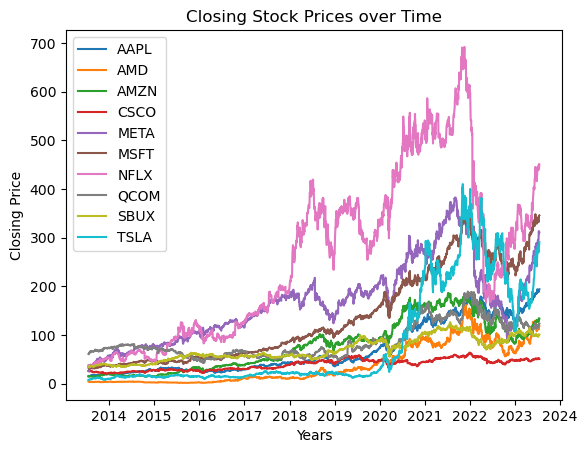

In [19]:
# Plotting the closing prices for each company
for Company, company_df in company_dfs.items():
    plt.plot(company_df['Date'], company_df['Close'], label=Company)

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing Stock Prices over Time')
plt.legend()

# Display the plot
plt.show()

#  Corelation Analysis

Calculating the correlation coefficient between the 'Close' prices and 'Volume' of a specific company's stock using Pearson's correlation coefficient (Pearson's r). This is done by first extracting the 'Close' and 'Volume' columns from the company's DataFrame.

The `scipy.stats.pearsonr()` function from the `scipy.stats` module is then used to compute the Pearson correlation coefficient and its associated p-value. The Pearson correlation coefficient quantifies the linear relationship between the two variables, 'Close' and 'Volume', with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). The p-value indicates the statistical significance of the computed correlation.

By analyzing the correlation between these variables, we gain insights into whether changes in stock prices are associated with changes in trading volumes for the specific company under consideration.


In [20]:
# The correlation coefficient
x = company_df['Close']
y = company_df['Volume']
# Pearson's r
scipy.stats.pearsonr(x, y) 

PearsonRResult(statistic=-0.07225618850800399, pvalue=0.00028640846220395896)

Calculating the Spearman's correlation coefficient between the 'Close' prices and 'Volume' of a specific company's stock. The `scipy.stats.spearmanr()` function from the `scipy.stats` module is used to compute the Spearman's correlation coefficient and its associated p-value.

Spearman's correlation coefficient assesses the monotonic relationship (whether the variables increase or decrease together) between the two variables, 'Close' and 'Volume', without assuming a linear relationship. The coefficient ranges from -1 (perfect negative monotonic relationship) to 1 (perfect positive monotonic relationship), with the p-value indicating the statistical significance of the correlation.

Using Spearman's correlation provides insights into the strength and direction of the relationship between stock prices and trading volumes, while allowing for non-linear trends.

In [21]:
# Spearman's r
scipy.stats.spearmanr(x, y)

SignificanceResult(statistic=0.10158454842954281, pvalue=3.288125211616433e-07)

Calculating Kendall's tau correlation coefficient between the 'Close' prices and 'Volume' of a specific company's stock. The `scipy.stats.kendalltau()` function from the `scipy.stats` module is used to compute Kendall's tau correlation coefficient and its associated p-value.

Kendall's tau measures the strength and direction of the ordinal relationship (order of values) between two variables, 'Close' and 'Volume'. The coefficient ranges from -1 (perfect negative ordinal correlation) to 1 (perfect positive ordinal correlation), with the p-value indicating the statistical significance of the correlation.

By using Kendall's tau, we assess the agreement in the rankings of stock prices and trading volumes, providing insights into the monotonic association between the two variables.

In [22]:
# Kendall's tau
scipy.stats.kendalltau(x, y)

SignificanceResult(statistic=0.06420951165972344, pvalue=1.3865942668635327e-06)

These correlation coefficients indicate a weak negative correlation between the closing prices and trading volumes for the last company in the dataset. The p-values are very small, suggesting that the correlations are statistically significant.

Using the `.corr()` method on the `stocks` DataFrame to calculate the Pearson correlation matrix for all columns in the dataset. The `method='pearson'` parameter specifies that Pearson's correlation coefficient should be used for the calculations.

The resulting correlation matrix provides a comprehensive view of the pairwise correlations between all numerical columns in the dataset. Each cell in the matrix represents the Pearson correlation coefficient between two variables. Positive values indicate positive correlation, negative values indicate negative correlation, and values closer to 0 indicate weaker correlation.

By analyzing the Pearson correlation matrix, we can identify potential relationships and dependencies between different features in the dataset.

In [23]:
# Correlation matrices for every column
correlation_matrix = stocks.corr(method='pearson')
print("Pearson Correlation Matrix:")
correlation_matrix

Pearson Correlation Matrix:


,Close,Volume,Open,High,Low
Close,1.000000,-0.213018,0.999588,0.999784,0.999800
Volume,-0.213018,1.000000,-0.212988,-0.210444,-0.215782
Open,0.999588,-0.212988,1.000000,0.999798,0.999791
High,0.999784,-0.210444,0.999798,1.000000,0.999697
Low,0.999800,-0.215782,0.999791,0.999697,1.000000


Once again using the `.corr()` method on the `stocks` DataFrame, but this time with `method='spearman'` to calculate the Spearman correlation matrix for all columns in the dataset.

The resulting correlation matrix provides insights into the monotonic relationships between numerical columns. Spearman's correlation captures ordinal relationships, making it suitable for variables with non-linear associations or data that is not normally distributed.

In [24]:
correlation_matrix = stocks.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
correlation_matrix


Spearman Correlation Matrix:


,Close,Volume,Open,High,Low
Close,1.000000,-0.300360,0.999803,0.999897,0.999895
Volume,-0.300360,1.000000,-0.300299,-0.297646,-0.303254
Open,0.999803,-0.300299,1.000000,0.999901,0.999888
High,0.999897,-0.297646,0.999901,1.000000,0.999829
Low,0.999895,-0.303254,0.999888,0.999829,1.000000


Using the `.corr()` method on the `stocks` DataFrame with `method='kendall'` to calculate the Kendall correlation matrix for all columns in the dataset.

The resulting correlation matrix provides insights into the ordinal relationships between numerical columns, similar to Spearman's correlation. However, Kendall's correlation places more emphasis on concordant and discordant pairs of data points, making it particularly useful for smaller sample sizes and detecting monotonic trends.

By analyzing the Kendall correlation matrix, we can identify monotonic associations and rank-based relationships between variables, which might reveal hidden patterns in the data.

In [25]:
correlation_matrix = stocks.corr(method='kendall')
print("\nKendall Correlation Matrix:")
correlation_matrix


Kendall Correlation Matrix:


,Close,Volume,Open,High,Low
Close,1.000000,-0.206808,0.989036,0.992865,0.992822
Volume,-0.206808,1.000000,-0.206752,-0.204741,-0.208993
Open,0.989036,-0.206752,1.000000,0.992980,0.992614
High,0.992865,-0.204741,0.992980,1.000000,0.990771
Low,0.992822,-0.208993,0.992614,0.990771,1.000000


Here are some observations:

* For some companies like AAPL, AMD, and NFLX, there is a moderate negative correlation between closing prices and trading volumes. This means that as the closing prices increase, the trading volumes tend to decrease and vice versa.
* For other companies like TSLA, there is a very weak positive correlation between closing prices and trading volumes. This indicates that there is almost no relationship between these two variables for this particular company.
* The correlation coefficients are not very strong, suggesting that the relationship between closing prices and trading volumes varies across different companies.

# Top Performer Identification

**Key Performance Metrics for Stock Market Analysis**

When conducting stock market analysis, it's crucial to use key performance metrics to assess the performance and behavior of various companies in the market. In this context, we have identified three essential metrics to evaluate the performance of companies based on historical stock market data.

1. **Percentage Price Change:** This metric calculates the percentage change in a company's stock price over a specific time period. It helps identify companies that have experienced significant growth or decline in stock prices. A higher percentage price change indicates a more significant price movement and potential investment opportunities or risks.

2. **Average Trading Volume:** The average trading volume measures the average number of shares traded per day for a particular company over a given period. It provides insights into the liquidity and demand for a company's stock. Higher average trading volumes usually indicate more active and liquid stocks, making it easier to buy or sell shares without impacting the stock's price significantly.

3. **Daily Volatility:** Volatility measures the degree of price fluctuation in a company's stock on a daily basis. It is commonly calculated as the standard deviation of daily closing prices. High daily volatility implies higher risk and uncertainty, while lower volatility may indicate a stable and less risky stock. Traders and investors often consider volatility when making trading decisions or assessing the potential risk of an investment.


Now Implementing the process to identify top-performing companies over a specified time period. The chosen time period is set using the `time_period` variable (e.g., yearly).

The code performs the following steps:

1. Grouping the data by company and the specified time period, using the `groupby()` function along with `pd.Grouper()`. This allows us to aggregate data by the specified time period.
2. Calculating performance metrics such as the opening and closing prices at the beginning and end of the time period, as well as the average trading volume during the period.
3. Calculating the percentage price change for each company over the time period.
4. Calculating the average trading volume and daily volatility for each company.
5. Sorting the companies based on multiple performance metrics, such as percentage price change, average volume, and daily volatility, in descending order.
6. Displaying the top-performing companies based on the calculated metrics.

By executing these steps, we can identify the companies that have exhibited the highest percentage price change, significant trading volume, and relatively low daily volatility over the specified time period, indicating strong performance.


In [26]:
# Define the time period for performance evaluation (e.g., yearly)
time_period = 'Y'

# Group the data by company and the specified time period, and calculate performance metrics
grouped_stocks = stocks.groupby(['Company', pd.Grouper(key='Date', freq=time_period)]).agg({
    'Close': 'first',  # Closing price at the beginning of the period
    'Close': 'last',   # Closing price at the end of the period
    'Volume': 'mean'   # Average trading volume over the period
}).reset_index()

# Calculate the percentage price change for each company over the time period
grouped_stocks['Close_first'] = grouped_stocks.groupby('Company')['Close'].transform('first')
grouped_stocks['Price_Change_Percentage'] = ((grouped_stocks['Close'] - grouped_stocks['Close_first']) / grouped_stocks['Close_first']) * 100

# Calculate the average trading volume for each company over the time period
grouped_stocks['Avg_Volume'] = grouped_stocks.groupby('Company')['Volume'].transform('mean')

# Calculate the daily volatility for each company (standard deviation of daily closing prices)
grouped_stocks['Daily_Volatility'] = grouped_stocks.groupby('Company')['Close'].transform('std')

# Sort the companies based on multiple performance metrics
top_performers = grouped_stocks.sort_values(by=['Price_Change_Percentage', 'Avg_Volume', 'Daily_Volatility'], ascending=[False, False, False])

# Print the top-performing companies
print("Top Performing Companies:")
top_performers.head()

Top Performing Companies:


,Company,Date,Close,Volume,Close_first,Price_Change_Percentage,Avg_Volume,Daily_Volatility
108,TSLA,2022-12-31,399.93,8.695692e+07,7.94,4936.901763,1.192828e+08,127.392221
20,AMD,2022-12-31,150.24,9.141995e+07,4.64,3137.931034,5.258419e+07,47.860020
107,TSLA,2021-12-31,243.26,8.219330e+07,7.94,2963.727960,1.192828e+08,127.392221
19,AMD,2021-12-31,92.30,5.125549e+07,4.64,1889.224138,5.258419e+07,47.860020
75,NFLX,2022-12-31,597.37,1.087698e+07,38.06,1469.548082,1.159333e+07,190.468795


Filtering the previously identified top-performing companies to include only data from the year 2022. This is achieved by using boolean indexing with the condition `top_performers['Date'].dt.year == 2022`.

By filtering the data to a specific year, we focus on the performance of these top-performing companies specifically during the year 2022. This allows us to analyze and compare their performance within a targeted time frame.

In [27]:
# Filter the data to include only the year 2022
top_performers_2022 = top_performers[top_performers['Date'].dt.year == 2022]

Creating a single graph with subplots to visualize various performance metrics for the top-performing companies in the year 2022.

The code performs the following steps:

1. Creates a figure with four subplots using `plt.subplots()`.
2. In the first subplot, iterates through each top-performing company and plots their closing prices over time. Each company is differentiated by using different colors and markers.
3. Sets labels, titles, and grids for each subplot.
4. Uses the second, third, and fourth subplots to create bar charts for the percentage price change, average trading volume, and daily volatility in 2022, respectively.
5. Adjusts the layout using `plt.tight_layout()` to prevent overlapping of plot elements.
6. Displays the combined graph and bar charts using `plt.show()`.

By visualizing the closing prices, percentage price change, average trading volume, and daily volatility, we can gain insights into the performance trends and characteristics of the top-performing companies during the year 2022.

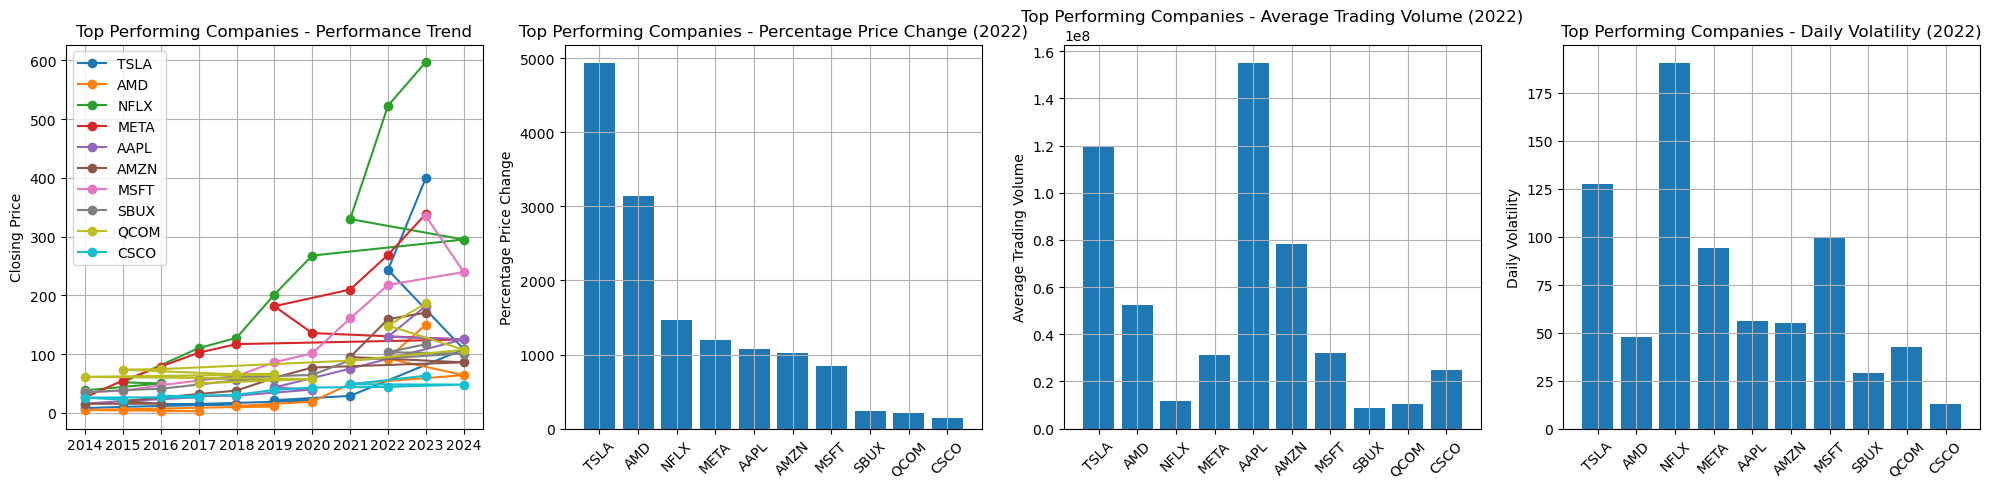

In [28]:
# Create a single graph to visualize the closing prices over time for the top-performing companies
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Iterate through each top-performing company and plot the closing prices with different colors
for company in top_performers['Company'].unique():
    company_data = top_performers[top_performers['Company'] == company]
    axs[0].plot(company_data['Date'], company_data['Close'], label=company, marker='o')

axs[0].set_ylabel('Closing Price')
axs[0].set_title('Top Performing Companies - Performance Trend')
axs[0].grid(True)
axs[0].legend()


# Bar chart for percentage price change in 2022
axs[1].bar(top_performers_2022['Company'], top_performers_2022['Price_Change_Percentage'])
axs[1].set_ylabel('Percentage Price Change')
axs[1].set_title('Top Performing Companies - Percentage Price Change (2022)')
axs[1].grid(True)
plt.sca(axs[1])
plt.xticks(rotation=45)

# Bar chart for average trading volume in 2022
axs[2].bar(top_performers_2022['Company'], top_performers_2022['Avg_Volume'])
axs[2].set_ylabel('Average Trading Volume')
axs[2].set_title('Top Performing Companies - Average Trading Volume (2022)')
axs[2].grid(True)
plt.sca(axs[2])
plt.xticks(rotation=45)

# Bar chart for daily volatility in 2022
axs[3].bar(top_performers_2022['Company'], top_performers_2022['Daily_Volatility'])
axs[3].set_ylabel('Daily Volatility')
axs[3].set_title('Top Performing Companies - Daily Volatility (2022)')
axs[3].grid(True)
plt.sca(axs[3])
plt.xticks(rotation=45)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the graphs and bar charts for the year 2022
plt.show()

* From the line chart, you can observe how the closing prices of these companies fluctuate over the year, identifying any upward or downward trends.
* The Bar corresponding to TSLA represents the highest percentage price change among these companies, indicating that TSLA experienced the most significant price increase or decrease during the year.
* The bar corresponding to APPL represents the highest average trading volume among these companies, indicating that APPL had the highest average daily trading activity in terms of the number of shares traded during the year.
* The bar corresponding to NFLX represents the highest daily volatility among these companies, indicating that NFLX had the most significant price fluctuations and price movements on a day-to-day basis during the year.

# Stock Market Predictions

Ensuring that the 'Date' column in the `stocks` DataFrame is in the datetime format using the `pd.to_datetime()` function. This conversion is important to ensure that the dates are recognized and treated as timestamps for time-series analysis.

After converting the 'Date' column to datetime format, we are using the `.set_index()` method to set the 'Date' column as the index of the DataFrame. Setting the index to the datetime values allows for efficient time-based indexing and enables us to perform time-series analysis and visualizations effectively.

In [29]:
# Ensure the 'Date' column is in datetime format and set it as the index
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date', inplace=True)

Extracting the stock price data for a specific company, which is represented by the variable `company_name`. The chosen company is 'TSLA' in this case.

The code performs the following steps:

1. Uses boolean indexing to filter the `stocks` DataFrame and extract rows where the 'Company' column matches the value specified in `company_name` ('TSLA' in this case).
2. Selects the 'Close' column from the filtered data to extract the closing prices for the specified company.

The resulting `company_data` Series represents the closing prices of the specified company's stock over time. This data can be used for various analyses and visualizations specific to the chosen company.

In [30]:
# Extract the stock price data for the specific company (e.g., 'TSLA')
company_name = 'TSLA'
company_data = stocks[stocks['Company'] == company_name]['Close']

Performing a train-test split on the time series data of a specific company's stock prices. The chosen split ratio is 80% for training and 20% for testing, which is set using the variable `train_size`.

The code performs the following steps:

1. Calculates the index at which the split should occur by multiplying the length of the `company_data` Series by 0.8 (80% train ratio).
2. Uses slicing to create two separate datasets: `train_data` containing the initial 80% of the data and `test_data` containing the remaining 20%.
3. The `train_data` Series includes the stock price data for training the model, while the `test_data` Series includes the stock price data for evaluating the model's performance.

This train-test split is essential for assessing how well a model generalizes to unseen data, which is crucial for evaluating the effectiveness of predictive models on time series data.

In [31]:
# Perform train-test split (e.g., 80% train, 20% test)
train_size = int(len(company_data) * 0.8)
train_data, test_data = company_data[:train_size], company_data[train_size:]

Fitting an ARIMA (AutoRegressive Integrated Moving Average) model to the training data of a specific company's stock prices. The ARIMA model is specified using the `order` parameter, which determines the order of the autoregressive (p), differencing (d), and moving average (q) components of the model.

The code performs the following steps:

1. Creates an ARIMA model instance with the specified order `(5, 1, 0)`. The order values should be determined based on domain knowledge, time series characteristics, and possibly using techniques like ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.
2. Uses the `.fit()` method to fit the ARIMA model to the `train_data`. This step estimates the model parameters based on the training data.

The resulting `model_fit` object represents the fitted ARIMA model, which can be used for making predictions and further analysis.

In [32]:
# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # Use appropriate order (p, d, q)
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

Using the fitted ARIMA model (`model_fit`) to make predictions for the same length as the test data. The `.forecast()` method of the ARIMA model is used to generate predictions.

The code performs the following step:

1. Calls the `.forecast()` method on the `model_fit` object, specifying the number of steps as the length of the `test_data`. This generates predictions for the stock prices over the same time span as the test data.

The resulting `predictions` array contains the predicted stock prices based on the fitted ARIMA model. These predictions can be compared with the actual test data to evaluate the model's accuracy and performance.

In [33]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the performance of the ARIMA model's predictions compared to the actual test data.

The code performs the following steps:

1. Uses the `mean_squared_error()` function from the `sklearn.metrics` module to calculate the MSE between the `test_data` (actual values) and the `predictions` (predicted values) arrays.
2. Computes the RMSE by taking the square root of the calculated MSE.
3. Prints the calculated MSE and RMSE values to provide insights into the model's accuracy in predicting stock prices.

MSE and RMSE are common metrics used to assess the accuracy of predictive models. Smaller values indicate better model performance, with RMSE providing a more interpretable measure in the same units as the original data.

In [34]:
# Calculate MSE and RMSE
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 32.02
RMSE: 5.66


Creating a line plot to visualize the predicted stock prices versus the actual stock prices for a specific company (represented by `company_name`).

The code performs the following steps:

1. Uses the `plt.plot()` function to plot the actual stock prices (`test_data`) as a solid line with the label 'Actual'.
2. Plots the predicted stock prices (`predictions`) as a dashed line with the label 'Predicted'.
3. Adds labels to the axes, a title, and a legend to the plot.
4. Displays the plot using `plt.show()`.

This visualization allows us to visually compare the predicted stock prices with the actual prices. By assessing the alignment of the two lines, we can gain insights into the model's performance in capturing the underlying patterns and trends in the stock price data.

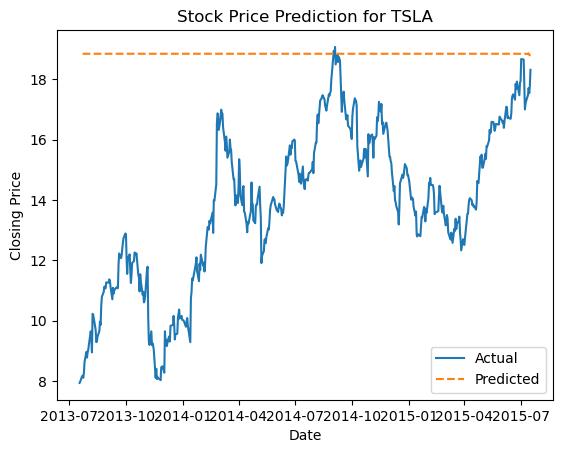

In [35]:
# Visualize the predicted vs. actual stock prices
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Stock Price Prediction for {company_name}')
plt.legend()
plt.show()

ARIMA model is not capturing the underlying patterns or seasonality in the data adequately. This is a common issue in time-series forecasting when the model is not able to adapt to the complexities of the data.

# Classification of Stock's Movement

Performing feature engineering on the `stocks` DataFrame to create additional features that might be useful for analysis and modeling.

The code performs the following steps:

1. Creates a new column 'Price_Change' by calculating the difference between consecutive closing prices using the `.diff()` method.
2. Calculates the 'Price_Change_Percentage' by dividing the 'Price_Change' by the previous day's closing price using `.shift(1)`.
3. Computes the 'Avg_Volume' by calculating the rolling average of trading volumes over a window of 5 days using `.rolling(window=5).mean()`.
4. Calculates the 'Daily_Volatility' by computing the rolling standard deviation of daily percentage changes in closing prices over a window of 5 days. The result is scaled by the square root of 252 to annualize the volatility.

By adding these engineered features, we enhance the dataset with potentially informative variables that can capture price changes, trends, and market volatility, enabling more robust analysis and modeling.

In [36]:
# Feature Engineering
stocks['Price_Change'] = stocks['Close'].diff()
stocks['Price_Change_Percentage'] = stocks['Price_Change'] / stocks['Close'].shift(1)
stocks['Avg_Volume'] = stocks['Volume'].rolling(window=5).mean()
stocks['Daily_Volatility'] = stocks['Close'].pct_change().rolling(window=5).std() * np.sqrt(252)

Dropping rows with NaN (Not a Number) values from the `stocks` DataFrame. These NaN values might have been introduced due to the rolling calculations performed in the feature engineering steps.

The code performs the following step:

1. Uses the `.dropna()` method to remove rows containing NaN values from the DataFrame. The `inplace=True` parameter ensures that the changes are applied to the DataFrame directly.

Dropping rows with NaN values is important to ensure the integrity and consistency of the dataset, as NaN values can adversely affect analysis and modeling results.

In [37]:
# Drop rows with NaN values (due to rolling calculations)
stocks.dropna(inplace=True)

Selecting relevant features and target variables for a classification task from the `stocks` DataFrame.

The code performs the following steps:

1. Creates the feature matrix `X` by selecting columns 'Price_Change_Percentage', 'Avg_Volume', and 'Daily_Volatility' from the DataFrame. These features are chosen based on their potential impact on predicting price changes.
2. Creates the target variable array `y` by applying a lambda function to the 'Price_Change' column. The lambda function converts positive price changes to 1 and non-positive changes to 0, effectively creating a binary classification problem.

The selected features and target variable are crucial for training and testing classification models to predict whether the price change will be positive (1) or not (0) based on the provided features.


In [38]:
# Select relevant features for training and testing
X = stocks[['Price_Change_Percentage', 'Avg_Volume', 'Daily_Volatility']]
y = stocks['Price_Change'].apply(lambda x: 1 if x > 0 else 0)

Using the `SimpleImputer` class from the `sklearn.impute` module to handle missing values in the features and target variables.

The code performs the following steps:

1. Creates an instance of `SimpleImputer` with the strategy set to 'mean'. This strategy replaces missing values with the mean value of the available data.
2. Converts the target variable `y` to a NumPy array using `.to_numpy()` and reshapes it to have a single column using `.reshape(-1, 1)`.
3. Applies the imputer to the target variable array `y` using the `.fit_transform()` method. This replaces missing values in `y` with the mean value.
4. Applies the same imputer to the feature matrix `X` using the `.fit_transform()` method. This replaces missing values in the features with the mean value.

Handling missing values is essential for creating consistent and complete datasets for training machine learning models, ensuring that the models can learn effectively from the available data.


In [39]:
# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
# Assuming y is a pandas Series
y_array = y.to_numpy().reshape(-1, 1)

y = imputer.fit_transform(y_array)
X = imputer.fit_transform(X)

Performing a train-test split on the feature matrix `X` and the target variable array `y` for a classification task.

The code performs the following steps:

1. Uses the `train_test_split()` function from the `sklearn.model_selection` module to split the data into training and testing sets. The `test_size` parameter is set to 0.2, indicating that 20% of the data will be used for testing.
2. The `random_state` parameter is set to 42 to ensure reproducibility of the split.

The resulting `X_train`, `X_test`, `y_train`, and `y_test` arrays represent the training and testing sets for both features and the target variable, respectively. These sets are used to train and evaluate classification models.


In [40]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training a Logistic Regression model using the training data.

The code performs the following steps:

1. Creates an instance of the `LogisticRegression` class from the `sklearn.linear_model` module.
2. Uses the `.fit()` method to train the model using the training feature matrix `X_train` and the corresponding target variable `y_train`.

After training, the `model` object represents a trained Logistic Regression classifier that can be used for making predictions on new data and evaluating its performance.


In [41]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Using the trained Logistic Regression model to make predictions on the test data.

The code performs the following step:

1. Calls the `.predict()` method on the trained `model`, passing the test feature matrix `X_test` as input. This generates predicted values for the target variable based on the provided features.

The resulting `y_pred` array contains the predicted binary classifications (0 or 1) for the test data. These predictions can be compared with the actual target values (`y_test`) to assess the model's accuracy and performance.


In [42]:
# Model Prediction
y_pred = model.predict(X_test)

Calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the performance of the trained Logistic Regression model's predictions compared to the actual test data.

The code performs the following steps:

1. Uses the `mean_squared_error()` function from the `sklearn.metrics` module to calculate the MSE between the actual target values (`y_test`) and the predicted values (`y_pred`).
2. Computes the RMSE by taking the square root of the calculated MSE.
3. Prints the calculated MSE and RMSE values to provide insights into the model's accuracy in predicting the binary classifications.

MSE and RMSE can be used as evaluation metrics for classification models, giving an indication of how well the model's predictions match the true target values.

In [43]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")

MSE : 0.47
RMSE : 0.68


Training a Random Forest Classifier model using the training data and making predictions on the test data.

*Model Training:*

1. Creates an instance of the `RandomForestClassifier` class from the `sklearn.ensemble` module, representing the Random Forest model.
2. Uses the `.fit()` method to train the Random Forest model using the training feature matrix `X_train` and the corresponding target variable `y_train`

*Model Prediction:*

1. Calls the `.predict()` method on the trained Random Forest model (`rf_model`), passing the test feature matrix `X_test` as input. This generates predicted values for the binary classifications (0 or 1) based on the provided features.

The resulting `y_pred_rf` array contains the predicted binary classifications for the test data using the Random Forest model. These predictions can be compared with the actual target values (`y_test`) to assess the model's accuracy and performance.


In [44]:
# Model Training - Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Model Prediction - Random Forest
y_pred_rf = rf_model.predict(X_test)


Calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the performance of the Random Forest Classifier's predictions compared to the actual test data.

The code performs the following steps:

1. Uses the `mean_squared_error()` function from the `sklearn.metrics` module to calculate the MSE between the actual target values (`y_test`) and the predicted values (`y_pred_rf`) obtained from the Random Forest Classifier.
2. Computes the RMSE by taking the square root of the calculated MSE.
3. Prints the calculated MSE and RMSE values to provide insights into the model's accuracy in predicting the binary classifications.

MSE and RMSE can be used as evaluation metrics for classification models, giving an indication of how well the model's predictions match the true target values.


In [45]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 0.47
RMSE: 0.68


Preprocessing the data and selecting relevant features for further analysis.

*Feature Selection:*

1. Creates the feature matrix `X` by selecting columns 'Price_Change_Percentage', 'Avg_Volume', and 'Daily_Volatility' from the `stocks` DataFrame. These features are chosen based on their potential impact on analysis or modeling.

*Handling Missing Values:*

1. Calls the `.dropna()` method on the feature matrix `X` to remove rows containing any missing values. This step is important to ensure that the analysis or modeling is conducted on complete and consistent data.

By performing feature selection and handling missing values, we prepare the data for analysis or modeling tasks.


In [46]:
# Preprocess the data and select relevant features
X = stocks[['Price_Change_Percentage', 'Avg_Volume', 'Daily_Volatility']].dropna()
# Check for and handle missing values
X = X.dropna()

Performing feature scaling on the selected features using the `StandardScaler` from the `sklearn.preprocessing` module.

The code performs the following steps:

1. Creates an instance of the `StandardScaler` class, represented by the `scaler` variable.
2. Uses the `.fit_transform()` method on the `scaler` object to scale the selected features in the feature matrix `X`. This process transforms the features to have zero mean and unit variance.

Feature scaling is important for many machine learning algorithms that are sensitive to the scale of features. By scaling the features, we ensure that they are on a comparable scale, which can improve the performance and convergence of certain algorithms.


In [47]:
# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Applying K-means clustering to the preprocessed and scaled feature matrix `X`.

The code performs the following steps:

1. Specifies the chosen optimal number of clusters `optimal_k`. Replace the value with the actual optimal number of clusters you have determined.
2. Creates an instance of the `KMeans` class from the `sklearn.cluster` module, represented by the variable `kmeans`. The `n_clusters` parameter is set to the chosen optimal K value.
3. Uses the `.fit_predict()` method on the `kmeans` object to apply K-means clustering to the scaled feature matrix `X`. This assigns each data point to one of the K clusters and returns cluster labels in the `clusters` array.

K-means clustering is an unsupervised machine learning technique used to group similar data points into clusters based on their feature values. The resulting `clusters` array indicates which cluster each data point belongs to.

In [48]:
# Choose the optimal K value and apply K-means clustering
optimal_k = 3  # Replace this with the chosen optimal K value
kmeans = KMeans(n_clusters=optimal_k)
clusters = kmeans.fit_predict(X)

Visualizing the results of K-means clustering by creating a scatter plot.

The code performs the following steps:

1. Uses the `plt.scatter()` function to create a scatter plot with the scaled features `Percentage Price Change` and `Average Trading Volume` as the x and y coordinates, respectively.
2. The `c` parameter is set to the `clusters` array, assigning a unique color to each cluster using the 'rainbow' colormap.
3. Adds labels to the axes and a title to the plot using `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` functions.
4. Displays the scatter plot using `plt.show()`.

The resulting plot visually represents the grouping of data points into clusters based on their scaled feature values.

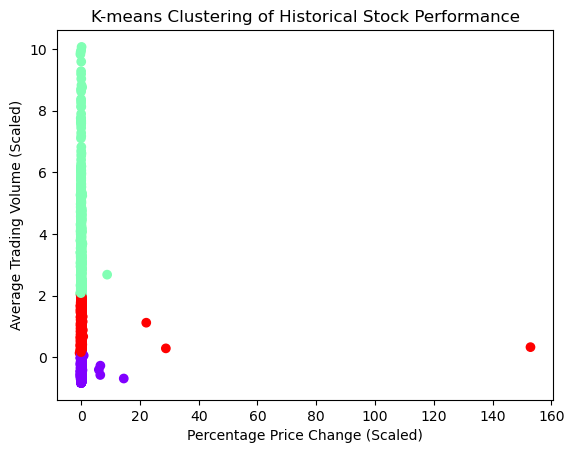

In [49]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Percentage Price Change (Scaled)')
plt.ylabel('Average Trading Volume (Scaled)')
plt.title('K-means Clustering of Historical Stock Performance')
plt.show()

Creating a DataFrame with cluster labels and original data, and then analyzing and interpreting the results of K-means clustering.

*Creating Clustered DataFrame:*

1. Creates a copy of the `stocks` DataFrame called `clustered_stocks`.
2. Adds a new column 'Cluster' to `clustered_stocks`, containing the cluster labels obtained from K-means clustering.

*Analyzing Results:*

1. Uses the `.groupby().agg()` method on the `clustered_stocks` DataFrame to group data by cluster and calculate aggregate statistics.
2. Calculates the mean of 'Price_Change_Percentage' and 'Avg_Volume' for each cluster.
3. Prints the cluster statistics using `print()`.

The resulting `cluster_stats` DataFrame contains the mean percentage price change and average trading volume for each cluster. Analyzing these statistics can provide insights into the characteristics and performance of different clusters in terms of price change and trading volume.


In [50]:
# Create a DataFrame with the cluster labels and original data
clustered_stocks = stocks.copy()
clustered_stocks['Cluster'] = clusters

# Analyze and interpret the results
cluster_stats = clustered_stocks.groupby('Cluster').agg({
    'Price_Change_Percentage': ['mean'],
    'Avg_Volume': ['mean']
})

print("Cluster Statistics:")
cluster_stats

Cluster Statistics:


,Price_Change_Percentage,Avg_Volume
,mean,mean
Cluster,,
0,0.000775,2.128330e+07
1,0.003841,2.478097e+08
2,0.018813,9.637049e+07


Based on the clustering analysis, we can observe the following characteristics of companies in each cluster:

Cluster 0:
- Relatively low mean percentage price change, indicates that their stock prices don't fluctuate significantly on a daily basis.
- Average trading volume, indicates a moderate level of trading activity.

Cluster 1:
- Higher mean percentage price change, suggests that their stock prices experience larger daily fluctuations.
- Average trading volume, indicatES a higher level of trading activity compared to other clusters.

Cluster 2:
- moderate mean percentage price change, indicates moderate daily fluctuations in their stock prices.
- Average trading volume, suggests a high level of trading activity.


# Artificial Neural Network

Performing feature scaling on the selected features using the `StandardScaler` from the `sklearn.preprocessing` module.

The code performs the following steps:

1. Creates an instance of the `StandardScaler` class, represented by the variable `scaler`.
2. Uses the `.fit_transform()` method on the `scaler` object to scale the selected features in the feature matrix `X`. This process transforms the features to have zero mean and unit variance.

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Performing a train-test split on the scaled feature matrix `X_scaled` and the target variable array `y` for a classification task.

The code performs the following steps:

1. Uses the `train_test_split()` function from the `sklearn.model_selection` module to split the scaled feature matrix and target variable data into training and testing sets. The `test_size` parameter is set to 0.2, indicating that 20% of the data will be used for testing.
2. The `random_state` parameter is set to 42 to ensure reproducibility of the split.

The resulting `X_train`, `X_test`, `y_train`, and `y_test` arrays represent the training and testing sets for both scaled features and the target variable, respectively. These sets are used to train and evaluate classification models.

In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Building a neural network model using the TensorFlow and Keras libraries.

The code defines a neural network with the following architecture:

1. `Sequential` model: Represents a linear stack of layers.
2. `Dense` layer with 64 units and ReLU activation function. The `input_shape` parameter is set to match the number of features in the scaled feature matrix `X_train`.
3. `Dense` layer with 32 units and ReLU activation function.
4. Final `Dense` layer with 1 unit, representing the output.

The neural network model is designed for a binary classification task, where it predicts whether the target variable will be positive or not based on the input features.

In [53]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

Compiling the neural network model using TensorFlow and Keras.

The code performs the following steps:

1. Creates an instance of the `SGD` optimizer from the `tf.keras.optimizers` module with a learning rate of 0.01.
2. Uses the `.compile()` method on the `model` object to compile the neural network. The `optimizer` parameter is set to the created `SGD` optimizer, and the `loss` parameter is set to 'mean_squared_error', which is used as the loss function during training.

Compiling the model prepares it for training by specifying the optimizer and loss function to be used. In this case, the model will be trained to minimize the mean squared error loss.

In [54]:
# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

Training the compiled neural network model using the training data.

The code performs the following steps:

1. Uses the `.fit()` method on the `model` object to train the neural network.
2. `X_train` and `y_train` are provided as training data and target values.
3. `epochs` is set to 10, indicating the number of times the entire training dataset is passed through the model during training.
4. `batch_size` is set to 32, specifying the number of samples used in each update of the model's weights.
5. `validation_split` is set to 0.2, indicating that 20% of the training data will be used for validation during each epoch.
6. `verbose` is set to 1, so progress updates will be printed during training.

The `history` object captures the training history, including loss and validation metrics over epochs. This information can be used to analyze the model's performance during training.

In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
504/504 [==============================] - 2s 2ms/step - loss: 0.3054 - val_loss: 0.2464
Epoch 2/10
504/504 [==============================] - 1s 1ms/step - loss: 0.2441 - val_loss: 0.2427
Epoch 3/10
504/504 [==============================] - 1s 1ms/step - loss: 0.2392 - val_loss: 0.2343
Epoch 4/10
504/504 [==============================] - 1s 1ms/step - loss: 0.2639 - val_loss: 0.2362
Epoch 5/10
504/504 [==============================] - 1s 1ms/step - loss: 0.2494 - val_loss: 0.2311
Epoch 6/10
504/504 [==============================] - 1s 2ms/step - loss: 0.2352 - val_loss: 0.2248
Epoch 7/10
504/504 [==============================] - 1s 2ms/step - loss: 0.2201 - val_loss: 0.2154
Epoch 8/10
504/504 [==============================] - 1s 2ms/step - loss: 0.2058 - val_loss: 0.1997
Epoch 9/10
504/504 [==============================] - 1s 2ms/step - loss: 0.1890 - val_loss: 0.1790
Epoch 10/10
504/504 [==============================] - 1s 1ms/step - loss: 0.1704 - val_loss: 0.1646

Evaluating the trained neural network model's performance on the test data.

The code performs the following steps:

1. Uses the trained `model` to predict the target variable values for the test feature matrix `X_test`.
2. Calculates the mean squared error (MSE) between the actual target values `y_test` and the predicted values `y_pred`.
3. Computes the root mean squared error (RMSE) by taking the square root of the calculated MSE.
4. Prints the calculated MSE and RMSE as evaluation metrics.

Evaluating the model on test data provides insights into how well the trained neural network performs on unseen data, helping to assess its generalization capability.


In [56]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

158/158 [==============================] - 0s 956us/step
MSE: 0.1660465013903491
RMSE: 0.40748803834020586
